<a href="https://colab.research.google.com/github/seoho0529/TensorFlow/blob/main/tf29character.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# 글자 단위 텍스트 생성 모델 작성
filename = 'engdata1.txt'

# et = open(filename, encoding='utf-8').read().lower()
# print(et)

# 드라이브 마운트된 파일 읽기
with open('/content/drive/MyDrive/Myfolder/engdata1.txt', 'r', encoding='utf-8') as f:
  et = f.read().lower()
print(et)

# 문자 인덱싱
chars = sorted(list(set(et)))
print(chars)
char_to_int = dict((c, i) for i, c in enumerate(chars))
print(char_to_int)

n_chars = len(et)
n_vocab = len(chars)
print('전체 글자 수 : ', n_chars)
print('전체 어휘 크기 : ', n_vocab)


seq_length = 50    #  학습할 문자를 해당 숫자 개씩 끊어서 만들기
datax = []
datay = []

for i in range(0, n_chars - seq_length, 1):
  seq_in = et[i:i + seq_length]
  seq_out = et[i + seq_length]
  # print(seq_in, ' : ', seq_out)
  datax.append([char_to_int[char] for char in seq_in])
  datay.append(char_to_int[seq_out])

print(datax)
print(datay)

datax_pattern = len(datax)
print('datax_pattern 행렬 유형 수 : ', datax_pattern)

# datax 구조 변경
import numpy as np
feature = np.reshape(datax, (datax_pattern, seq_length, 1))
print(feature[:1], feature.shape)

feature = feature / float(n_vocab)
print(feature[:1])

from keras.utils import to_categorical
label = to_categorical(datay)
print(label[:1])

a group of us fighter jets stationed in south korea joined an annual aerial exercise in singapore last month, the us air force has said, with a commercial aircraft refueling the fighters en route to the city-state for the first time.
the us military deployed six f-16s of the 51st fighter wing at osan air base in pyeongtaek, 60 kilometers south of seoul, to participate in the bilateral commando sling exercise with the singaporean air force at paya lebar air base from nov. 6 to 24.
during the flight to the city-state, a commercial kdc‐10 tanker aircraft refueled the f-16s in the first such instance, the us military said.
the us air force has previously deployed its fighters in south korea for commando sling. in 2018, six f-16s from kunsan air base in gunsan, 178 km south of seoul, joined the exercise.
the latest three-week exercise featured fighter air-to-air capabilities and flight support operations, with the osan-based jets training with singaporean f-15, f-16 and a-330 multi-role tan

In [9]:
# model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import sys
import matplotlib.pyplot as plt

model = Sequential()  # 글자 단위는 Embedding 레이어 없다.
model.add(LSTM(units=256, input_shape=(feature.shape[1], feature.shape[2]), activation='tanh', return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(LSTM(units=256, activation='tanh'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=label.shape[1], activation='softmax'))
print(model.summary())

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

chkPoint = ModelCheckpoint('tf29model.hdf5', monitor='loss', verbose=0, save_best_only=True, mode='min')
es = EarlyStopping(monitor='loss', patience=10)
history = model.fit(feature, label, batch_size=32, epochs=500, verbose=2, callbacks=[es, chkPoint])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50, 256)           264192    
                                                                 
 dropout_2 (Dropout)         (None, 50, 256)           0         
                                                                 
 lstm_3 (LSTM)               (None, 256)               525312    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 42)                10794     
                                                                 
Total params: 800298 (3.05 MB)
Trainable params: 800298 (3.05 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/500
4

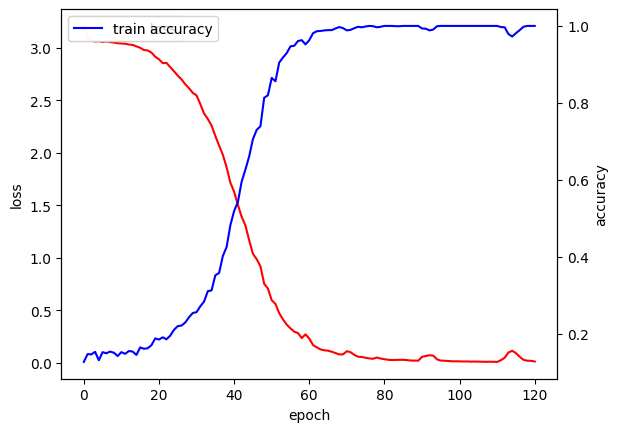

In [10]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], label='train loss', c='r')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['accuracy'], label='train accuracy', c='b')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [11]:
print('문장 작성 -------------------------')
int_to_char = dict((i, c) for i, c in enumerate(chars))
print('int_to_char :', int_to_char)

start = np.random.randint(0, len(datax) - 1)
pattern = datax[start]
print('pattern :', pattern)

print('seed :')
print("\"", ''.join([int_to_char[value] for value in pattern]), "\"")
print()
for i in range(500): # 글자 500개로 문장 생성
  x = np.reshape(pattern, (1, len(pattern), 1))
  x = x / float(n_vocab)
  pred = model.predict(x, verbose=0)
  # print(pred)
  index = np.argmax(pred)
  result = int_to_char[index] # 인덱스 번째 문자를 얻음
  seq_in = [int_to_char[value] for value in pattern]
  # print(result)
  sys.stdout.write(result)
  pattern.append(index) # 예측된 글자를 누적
  pattern = pattern[1:len(pattern)]

print('종료')

문장 작성 -------------------------
int_to_char : {0: '\n', 1: ' ', 2: '"', 3: "'", 4: ',', 5: '-', 6: '.', 7: '0', 8: '1', 9: '2', 10: '3', 11: '4', 12: '5', 13: '6', 14: '7', 15: '8', 16: '9', 17: 'a', 18: 'b', 19: 'c', 20: 'd', 21: 'e', 22: 'f', 23: 'g', 24: 'h', 25: 'i', 26: 'j', 27: 'k', 28: 'l', 29: 'm', 30: 'n', 31: 'o', 32: 'p', 33: 'r', 34: 's', 35: 't', 36: 'u', 37: 'v', 38: 'w', 39: 'x', 40: 'y', 41: '‐'}
pattern : [25, 30, 25, 30, 23, 1, 38, 25, 35, 24, 1, 34, 25, 30, 23, 17, 32, 31, 33, 21, 17, 30, 1, 22, 5, 8, 12, 4, 1, 22, 5, 8, 13, 1, 17, 30, 20, 1, 17, 5, 10, 10, 7, 1, 29, 36, 28, 35, 25, 5]
seed :
" ining with singaporean f-15, f-16 and a-330 multi- "

role tanker transport aircraft, the service said.
"osan pilots were able to train in dissimilar dog fighting, combined tactics and increase airborne training time through air-to-air refueling," it said in a recent release.
commando sling, which first began in 1990, is designed to build aerial communication, increase interop